In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from eda_rinus import timechange, features, features_aggr, counting_mood_days
from sklearn import preprocessing
import numpy as np


# read csv file
sdf = pd.read_csv('data/dataset_mood_smartphone.csv', index_col=0)

# drop rows where there's no number in column named 'value'
# sdf.dropna()

# Example of filtering mood values being non-negative
# sdf_mood = sdf.loc[(sdf['variable'] == 'mood')]
# index_neg = sdf_mood[sdf_mood['value'] < 0].index
# sdf_mood.drop(index_neg, inplace=True)
# display(sdf_mood)

# Normalizing the Mood DF
# mood = sdf.values
# min_max_scaler = preprocessing.MinMaxScaler()
# mood_scaled = min_max_scaler.fit_transform(mood)
# sdf = pd.DataFrame(mood_scaled)
# display(sdf)

# retrieve index for which column named 'value' is negative
# index_neg = sdf[sdf['value'] < 0].index

# drop those indexes
# sdf.drop(index_neg, inplace=True)

display(sdf)

,id,time,variable,value
1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [2]:
sdf = timechange(sdf)
display(sdf)



,id,time,variable,value,hour
1,AS14.01,2014-02-26,mood,6.000,13
2,AS14.01,2014-02-26,mood,6.000,15
3,AS14.01,2014-02-26,mood,6.000,18
4,AS14.01,2014-02-26,mood,7.000,21
5,AS14.01,2014-02-27,mood,6.000,9
...,...,...,...,...,...
2770399,AS14.30,2014-04-11,appCat.weather,8.032,7
2772465,AS14.30,2014-04-19,appCat.weather,3.008,11
2774026,AS14.30,2014-04-26,appCat.weather,7.026,10
2774133,AS14.30,2014-04-27,appCat.weather,23.033,0


In [3]:
print("features (not combined)")
print(features(sdf))

features (not combined)
                        count    mean     std       min    25%    50%     75%  \
variable                                                                        
mood                   5641.0    6.99    1.03      1.00   7.00   7.00    8.00   
circumplex.arousal     5597.0   -0.10    1.05     -2.00  -1.00   0.00    1.00   
circumplex.valence     5487.0    0.69    0.67     -2.00   0.00   1.00    1.00   
activity              22965.0    0.12    0.19      0.00   0.00   0.02    0.16   
screen                96578.0   75.34  253.82      0.04   5.32  20.04   62.54   
call                   5239.0    1.00    0.00      1.00   1.00   1.00    1.00   
sms                    1798.0    1.00    0.00      1.00   1.00   1.00    1.00   
appCat.builtin        91288.0   18.54  415.99 -82798.87   2.02   4.04    9.92   
appCat.communication  74276.0   43.34  128.91      0.01   5.22  16.23   45.48   
appCat.entertainment  27125.0   37.58  262.96     -0.01   1.33   3.39   14.92   
appC

In [4]:
print("features (combined)")
print(features_aggr(sdf, aggr_features=True))


features (combined)
                      count   mean     std       min   25%    50%    75%  \
variable                                                                   
mood                 5641.0   6.99    1.03      1.00  7.00   7.00   8.00   
circumplex.values   11084.0   0.29    0.97     -2.00  0.00   1.00   1.00   
activity            22965.0   0.12    0.19      0.00  0.00   0.02   0.16   
screen              96578.0  75.34  253.82      0.04  5.32  20.04  62.54   
call                 5239.0   1.00    0.00      1.00  1.00   1.00   1.00   
sms                  1798.0   1.00    0.00      1.00  1.00   1.00   1.00   
appCat.values      233405.0  34.24  305.64 -82798.87  3.01   7.04  25.50   

                        max  trimmed mean  
variable                                   
mood                  10.00      7.033090  
circumplex.values      2.00      0.355779  
activity               1.00      0.090174  
screen              9867.01     41.731878  
call                   1.00    

In [5]:
# calculate average value per variable per day
display(sdf.groupby(['id', 'time', 'variable'])['value'].mean().to_frame().reset_index())
# test = sdf.groupby(['id', 'time', 'variable'])['value'].mean()
# test = test.to_frame().reset_index()
# display(test)


# from scipy import stats
# test = sdf.groupby(['id', 'time', 'variable'])['value'].mean()
# # test = stats.trim_mean(sdf.groupby(['id', 'time', 'variable'])['value'], 0.1)
# # test = test.to_frame().reset_index()
# display(test)
# # stats.trim_mean(data, 0.1)


,id,time,variable,value
0,AS14.01,2014-02-17,call,1.000000
1,AS14.01,2014-02-18,call,1.000000
2,AS14.01,2014-02-19,call,1.000000
3,AS14.01,2014-02-19,sms,1.000000
4,AS14.01,2014-02-20,call,1.000000
...,...,...,...,...
8207,AS14.33,2014-05-30,circumplex.values,-0.600000
8208,AS14.33,2014-05-30,mood,6.800000
8209,AS14.33,2014-05-30,screen,86.342245
8210,AS14.33,2014-05-31,circumplex.values,-0.500000


In [6]:
mood_days, moodless_days = counting_mood_days(sdf)

print("mood_days: ")
print(mood_days)
print("moodless_days: ")
print(moodless_days)





mood_days: 
[{'AS14.01': 222}, {'AS14.02': 159}, {'AS14.03': 221}, {'AS14.05': 241}, {'AS14.06': 203}, {'AS14.07': 192}, {'AS14.08': 299}, {'AS14.09': 197}, {'AS14.12': 185}, {'AS14.13': 244}, {'AS14.14': 164}, {'AS14.15': 269}, {'AS14.16': 231}, {'AS14.17': 237}, {'AS14.19': 221}, {'AS14.20': 202}, {'AS14.23': 159}, {'AS14.24': 238}, {'AS14.25': 131}, {'AS14.26': 329}, {'AS14.27': 199}, {'AS14.28': 169}, {'AS14.29': 187}, {'AS14.30': 224}, {'AS14.31': 198}, {'AS14.32': 128}, {'AS14.33': 192}]
moodless_days: 
[{'AS14.01': 21777}, {'AS14.02': 14422}, {'AS14.03': 14204}, {'AS14.05': 15504}, {'AS14.06': 17889}, {'AS14.07': 15853}, {'AS14.08': 7603}, {'AS14.09': 10689}, {'AS14.12': 17126}, {'AS14.13': 19348}, {'AS14.14': 9122}, {'AS14.15': 2579}, {'AS14.16': 3751}, {'AS14.17': 15589}, {'AS14.19': 11176}, {'AS14.20': 3418}, {'AS14.23': 21693}, {'AS14.24': 14192}, {'AS14.25': 12458}, {'AS14.26': 16074}, {'AS14.27': 14376}, {'AS14.28': 19107}, {'AS14.29': 17312}, {'AS14.30': 17055}, {'AS14.31

In [7]:
# make a dict of all variables that are in the csv file
# features = retrieve_dict()

# calculate average value per variable per day and keep only one per variable per day left
new_sdf = sdf.groupby(['id', 'time', 'variable'])['value'].mean().to_frame().reset_index()

# transform sdf to a pivot table --> this lines up the distinct variables into columns instead of rows
# based on: https://pandas.pydata.org/docs/user_guide/reshaping.html
sdf_pivot = new_sdf.pivot(index=['id', 'time'], columns=['variable'], values=['value'])
sdf_pivot.columns = sdf_pivot.columns.droplevel(0)
# tranform pivot table back into a dataframe to make it easier to work with
organised_sdf = sdf_pivot.reset_index().rename_axis(None, axis=1)
display(organised_sdf)





,id,time,activity,appCat.values,call,circumplex.values,mood,screen,sms
0,AS14.01,2014-02-17,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-18,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-19,NaN,NaN,1.0,NaN,NaN,NaN,1.0
3,AS14.01,2014-02-20,NaN,NaN,1.0,NaN,NaN,NaN,1.0
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,29.703532,1.0,-0.100000,6.2,113.607750,1.0
1969,AS14.33,2014-05-28,0.103301,27.164437,1.0,0.600000,8.2,113.657683,1.0
1970,AS14.33,2014-05-29,0.169354,32.128034,1.0,-0.166667,7.0,118.978033,1.0
1971,AS14.33,2014-05-30,0.192901,27.741684,1.0,-0.600000,6.8,86.342245,NaN


In [8]:
organised_sdf.isnull().sum()



id                      0
time                    0
activity              785
appCat.values         764
call                  635
circumplex.values     705
mood                  705
screen                766
sms                  1239
dtype: int64

In [9]:
# make list to save values to create a new df with
data = []
# retrieve days with and without mood per user
for users in organised_sdf.id.unique():
    user_rows = organised_sdf.loc[organised_sdf.id == users]

    mood_days = 0
    # mood_days_list = []
    moodless_days = 0
    # moodless_days_list = []

    for i, day in user_rows.iterrows():
        if np.isnan(day.mood):
            moodless_days += 1
        else:
            mood_days += 1
    data.append([users[0:], mood_days, moodless_days])
    print(f"User {users[0:]} has got {mood_days} mood_days and {moodless_days} moodless_days")
# create new df
mood_df = pd.DataFrame(data, columns = ['ID', 'Mood', 'Moodless'])

display(mood_df)

User AS14.01 has got 47 mood_days and 25 moodless_days
User AS14.02 has got 41 mood_days and 27 moodless_days
User AS14.03 has got 47 mood_days and 30 moodless_days
User AS14.05 has got 53 mood_days and 17 moodless_days
User AS14.06 has got 45 mood_days and 29 moodless_days
User AS14.07 has got 48 mood_days and 2 moodless_days
User AS14.08 has got 62 mood_days and 5 moodless_days
User AS14.09 has got 46 mood_days and 25 moodless_days
User AS14.12 has got 41 mood_days and 26 moodless_days
User AS14.13 has got 53 mood_days and 19 moodless_days
User AS14.14 has got 44 mood_days and 28 moodless_days
User AS14.15 has got 55 mood_days and 24 moodless_days
User AS14.16 has got 53 mood_days and 21 moodless_days
User AS14.17 has got 56 mood_days and 19 moodless_days
User AS14.19 has got 46 mood_days and 27 moodless_days
User AS14.20 has got 47 mood_days and 19 moodless_days
User AS14.23 has got 39 mood_days and 24 moodless_days
User AS14.24 has got 55 mood_days and 7 moodless_days
User AS14.25 

,ID,Mood,Moodless
0,AS14.01,47,25
1,AS14.02,41,27
2,AS14.03,47,30
3,AS14.05,53,17
4,AS14.06,45,29
5,AS14.07,48,2
6,AS14.08,62,5
7,AS14.09,46,25
8,AS14.12,41,26
9,AS14.13,53,19


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'AS14.01'),
  Text(1, 0, 'AS14.02'),
  Text(2, 0, 'AS14.03'),
  Text(3, 0, 'AS14.05'),
  Text(4, 0, 'AS14.06'),
  Text(5, 0, 'AS14.07'),
  Text(6, 0, 'AS14.08'),
  Text(7, 0, 'AS14.09'),
  Text(8, 0, 'AS14.12'),
  Text(9, 0, 'AS14.13'),
  Text(10, 0, 'AS14.14'),
  Text(11, 0, 'AS14.15'),
  Text(12, 0, 'AS14.16'),
  Text(13, 0, 'AS14.17'),
  Text(14, 0, 'AS14.19'),
  Text(15, 0, 'AS14.20'),
  Text(16, 0, 'AS14.23'),
  Text(17, 0, 'AS14.24'),
  Text(18, 0, 'AS14.25'),
  Text(19, 0, 'AS14.26'),
  Text(20, 0, 'AS14.27'),
  Text(21, 0, 'AS14.28'),
  Text(22, 0, 'AS14.29'),
  Text(23, 0, 'AS14.30'),
  Text(24, 0, 'AS14.31'),
  Text(25, 0, 'AS14.32'),
  Text(26, 0, 'AS14.33')])

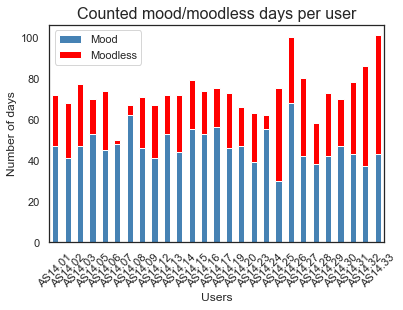

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
mood_df.set_index('ID').plot(kind='bar', stacked=True, color=['steelblue', 'red'])

# set figure size
# plt.figure(figsize=(20,5))

#add overall title
plt.title('Counted mood/moodless days per user', fontsize=16)

#add axis titles
plt.xlabel('Users')
plt.ylabel('Number of days')

#rotate x-axis labels
plt.xticks(rotation=45)

In [11]:
lgbm_data = organised_sdf
lgbm_data = lgbm_data.drop('id', axis=1).set_index('time')
display(lgbm_data)

,activity,appCat.values,call,circumplex.values,mood,screen,sms
time,,,,,,,
2014-02-17,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2014-02-18,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2014-02-19,NaN,NaN,1.0,NaN,NaN,NaN,1.0
2014-02-20,NaN,NaN,1.0,NaN,NaN,NaN,1.0
2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...
2014-05-27,0.012704,29.703532,1.0,-0.100000,6.2,113.607750,1.0
2014-05-28,0.103301,27.164437,1.0,0.600000,8.2,113.657683,1.0
2014-05-29,0.169354,32.128034,1.0,-0.166667,7.0,118.978033,1.0


In [12]:
# impute missing values based on previous day
# heavily inspired by: https://www.analyticsvidhya.com/blog/2020/10/multivariate-multi-step-time-series-forecasting-using-stacked-lstm-sequence-to-sequence-autoencoder-in-tensorflow-2-0-keras/
def fill_missing(values):
    one_day = 60*24
    for row in range(df.shape[0]):
        for col in range(df.shape[1]):
            if np.isnan(values[row][col]):
                values[row,col] = values[row-one_day,col]
df = lgbm_data.astype('float32')
fill_missing(df.values)
df = df.fillna(0)
print(df.isnull().sum())
df.to_csv('data/testtest3.csv')

activity             0
appCat.values        0
call                 0
circumplex.values    0
mood                 0
screen               0
sms                  0
dtype: int64


<AxesSubplot:>

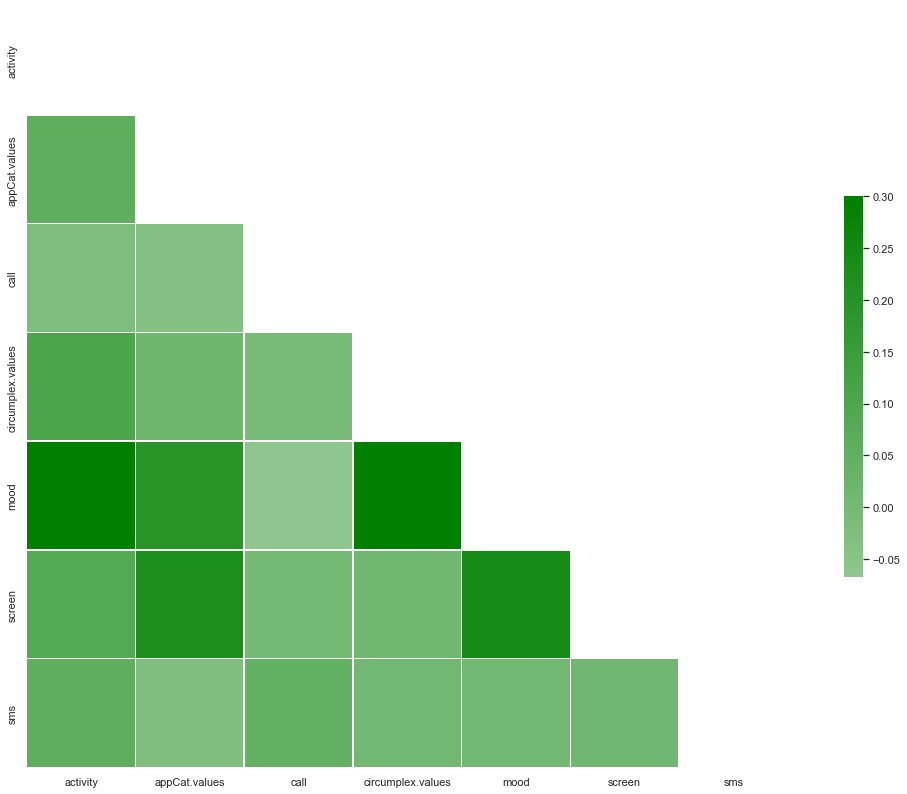

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# set NaN values for columns sms and call to 0 
# organised_sdf[['sms', 'call']] = organised_sdf[['sms', 'call']].fillna(value=0)

df = df.reset_index()

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,14))

# Generate a custom diverging colormap
# cmap = sns.palplot(sns.light_palette((210, 90, 60), input="husl"))
cmap = sns.light_palette("green", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



,activity,appCat.values,call,circumplex.values,mood,screen,sms
time,,,,,,,
2014-02-17,0.041548,21.900333,1.0,0.125000,6.250000,22.162157,0.0
2014-02-18,0.015309,22.311789,1.0,-0.142857,6.500000,56.542267,0.0
2014-02-19,0.064394,37.849680,1.0,0.100000,6.600000,137.494630,1.0
2014-02-20,0.039220,38.048714,1.0,0.000000,6.333334,117.011760,1.0
2014-02-21,0.042033,12.750950,1.0,0.600000,7.200000,33.210304,1.0
...,...,...,...,...,...,...,...
2014-05-27,0.012704,29.703531,1.0,-0.100000,6.200000,113.607750,1.0
2014-05-28,0.103301,27.164436,1.0,0.600000,8.200000,113.657684,1.0
2014-05-29,0.169354,32.128033,1.0,-0.166667,7.000000,118.978035,1.0


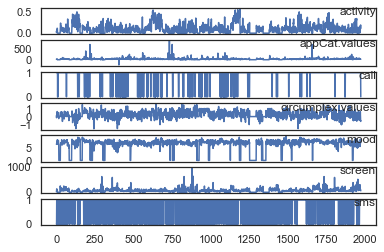

In [14]:
from pandas import read_csv

dataset = read_csv('data/testtest3.csv', header=0, index_col=0)
display(dataset)
values = dataset.values

# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
    # pyplot.figure(figsize=(1,1))
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
import lightgbm as lgbm

dataset = read_csv('data/testtest3.csv', header=0)

# train, test = train_test_split(dataset, test_size=0.2, random_state=25)

features_train = ['activity', 'appCat.values', 'call', 'circumplex.values', 'screen', 'sms']
target_train = 'mood'

X_train, X_val, y_train, y_val = train_test_split(
    dataset[features_train], dataset[target_train], test_size=0.2)

train_data = lgbm.Dataset(X_train, label=y_train)

test_data = lgbm.Dataset(X_val, label=y_val)

In [64]:
origin_features =  ['activity', 'appCat.values', 'call', 'circumplex.values', 'screen', 'sms'
                    ]

target_train = 'mood'

# using the full set for training
training_set = dataset[origin_features + [target_train]].sample(500)

# separating the variable that is to be predicted by the model from the rest
X = training_set.drop(target_train, axis=1)
y = training_set[target_train]

features = X.columns

# built a validation set on flights_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Las = Lasso()
LinR = LinearRegression()
Rid = Ridge()
Rfc = RandomForestRegressor(random_state=2)
Dtc = DecisionTreeRegressor(random_state = 2)
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)
Boost_las = AdaBoostRegressor(base_estimator=Las,random_state=2)
Boost_rid = AdaBoostRegressor(base_estimator=Rid,random_state=2)
Bg_Lin = BaggingRegressor(base_estimator=LinR,random_state=2)
Bg_las = BaggingRegressor(base_estimator=Las,random_state=2)
Bg_rid = BaggingRegressor(base_estimator=Rid,random_state=2)

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

model_columns = []
models_compare = pd.DataFrame(columns = model_columns)
results=[]

row_index = 0
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):

    model1 = model.fit(X_train,y_train)
    Y_predict = model1.predict(X_test)
    results.append(Y_predict)
    mae_score = mean_absolute_error(y_test, Y_predict)
    mse_score = mean_squared_error(y_test, Y_predict)
    rmse_score = np.sqrt(mean_squared_error(y_test, Y_predict))
    # r2_score = r2_score(y_test, Y_predict)
    # MLA_name = alg.__class__.__name__
    models_compare.loc[row_index,'Model Name'] = name
    models_compare.loc[row_index, 'MAE'] = mae_score
    models_compare.loc[row_index, 'MSE'] = mse_score
    models_compare.loc[row_index, 'RMSE'] = rmse_score   

    # cv_results = cross_val_score(model, X_train, y_train, cv=10)
    # results.append(cv_results)
    # predicted = model.fit(X_train, y_train).predict(X_test)
    # fp, tp, th = roc_curve(y_test, predicted)
    # MLA_name = model.__class__.__name__
    # MLA_compare.loc[row_index,'Model Name'] = model
    # MLA_compare.loc[row_index, 'Model Train Accuracy'] = round(model.score(X_train, y_train), 4)
    # MLA_compare.loc[row_index, 'Model Test Accuracy'] = round(model.score(X_test, y_test), 4)
    # MLA_compare.loc[row_index, 'Model AUC'] = auc(fp, tp)
    
    row_index+=1
    
models_compare.sort_values(by = ['MSE'], ascending = True, inplace = True)    
models_compare

,Model Name,MAE,MSE,RMSE
4,Decision Tree Regressor,0.641097,1.028292,1.014047
3,Random forest Regressor,0.737542,1.821221,1.349526
8,Bagged Linear,1.287060,3.533114,1.879658
1,Linear Regression,1.294084,3.537145,1.880730
10,Bagged Ridge,1.264042,3.580228,1.892149
2,Ridge,1.270477,3.583177,1.892928
7,Boosted Ridge,1.629894,4.037171,2.009271
5,Boosted Linear,1.684598,4.250498,2.061674
9,Bagged Lasso,1.374948,4.626187,2.150857
0,Lasso,1.394695,4.669369,2.160872


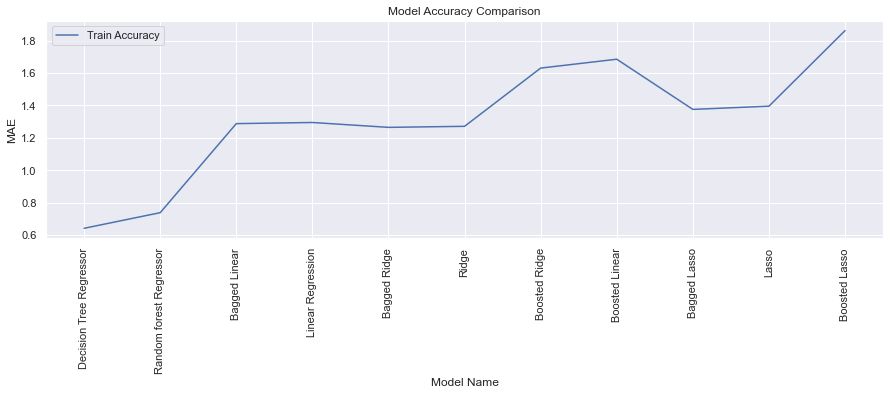

In [71]:
plt.subplots(figsize=(15,4))
sns.lineplot(x="Model Name", y="MAE",data=models_compare,label='Train Accuracy')
# sns.lineplot(x="Model Name", y="Model Test Accuracy",data=models_compare,label='Test Accuracy')
plt.xticks(rotation=90)
plt.title('Model Accuracy Comparison')
plt.legend()
plt.show()

[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 35.0678
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 35.0607
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 35.0464
[4]	valid_0's l2: 35.0345
[5]	valid_0's l2: 35.0216
[6]	valid_0's l2: 35.0062
[7]	valid_0's l2: 34.9605
[8]	valid_0's l2: 34.943

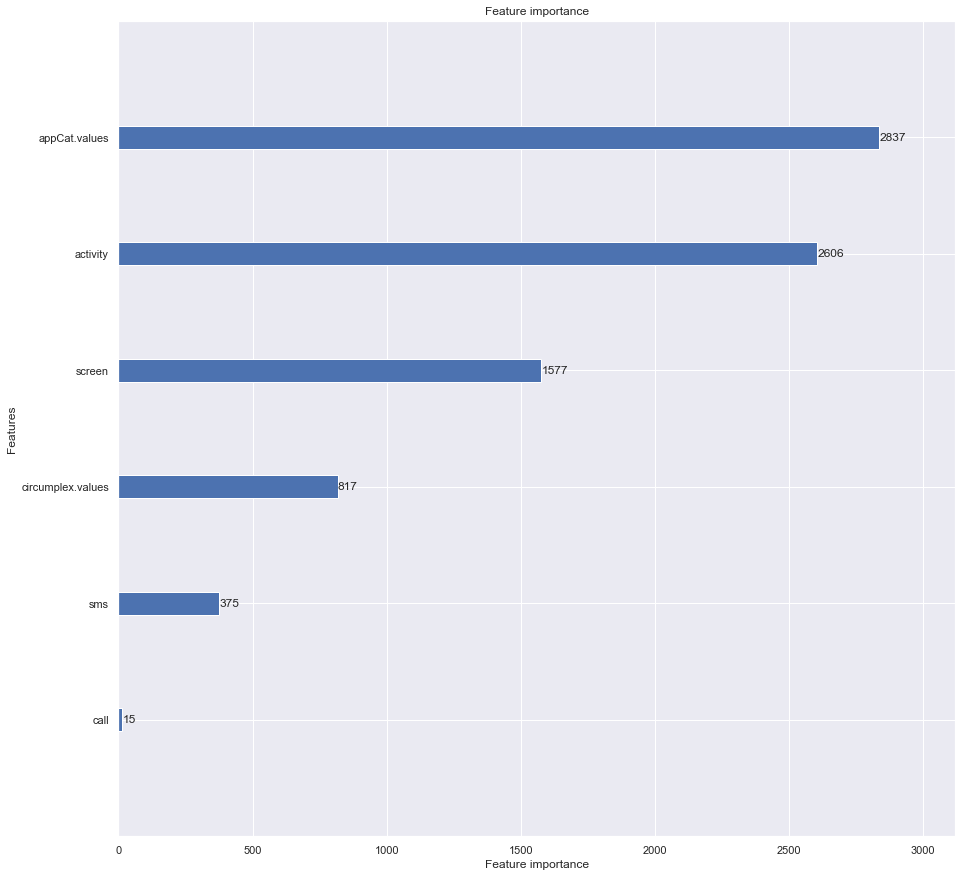

In [69]:
# determine style
sns.set_theme(style="darkgrid")

#basic parameter:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'mse',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 25,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

# determine model
model = lgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=1000,
                       early_stopping_rounds=100)

# plot and show feature importance
ax = lgbm.plot_importance(model, max_num_features=40, figsize=(15, 15))
plt.show()

In [70]:
hyper_params = {
    'random_state': 420,
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['mse'],
    'learning_rate': 0.1,
    "num_leaves": 256,
    'max_depth': 9,
    # 'min_data_in_leaf': 70,
    # "max_bin": 512,
}

train_data = lgbm.Dataset(X_train, label=y_train, categorical_feature='auto')
test_data = lgbm.Dataset(X_val, label=y_val, categorical_feature='auto')

model = lgbm.train(hyper_params, train_data, num_boost_round=500, verbose_eval=False)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 6
[LightGBM] [Info] Start training from score 6.435583
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [18]:
import pickle

# save
with open('models/LGBM_MSE.pkl','wb') as f:
    pickle.dump(model,f)

In [19]:
y_pred = model.predict(X_val[features_train])

predictions = pd.DataFrame({'predicted': y_pred, 'actual': y_val})

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(predictions['actual'], predictions['predicted'])
mae = mean_absolute_error(predictions['actual'], predictions['predicted'])

print(f"MSE is: {mse}")
print(f"MAE is: {mae}")



MSE is: 0.8667620594804095
MAE is: 0.5241628487364316


Tried to make a LSTM-model; is not working yet, unfortunately

In [29]:
df = pd.read_csv('data/testtest3.csv', header=0, index_col=0)
cols = list(df)[1:7]
print(cols)

['appCat.values', 'call', 'circumplex.values', 'mood', 'screen', 'sms']


In [60]:
# https://github.com/bnsreenu/python_for_microscopists/blob/master/181_multivariate_timeseries_LSTM_GE.py

# https://youtu.be/tepxdcepTbY
"""
@author: Sreenivas Bhattiprolu
Code tested on Tensorflow: 2.2.0
    Keras: 2.4.3
dataset: https://finance.yahoo.com/quote/GE/history/
Also try S&P: https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC
"""

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from datetime import datetime

# dataset = read_csv('data/testtest3.csv', header=0, index_col=['time'])
# split into train and test
# train, test = split_dataset(dataset.values)
# X_train, X_val, y_train, y_val = train_test_split(
#     dataset[features_train], dataset[target_train], test_size=0.2)
# train, test = train_test_split(dataset, test_size=0.2, random_state=25)

#Read the csv file
df = pd.read_csv('data/testtest3.csv')
# print(df.head()) #7 columns, including the Date. 

#Separate dates for future plotting
train_dates = pd.to_datetime(df['time'])
# print(train_dates.tail(15)) #Check last few dates. 

#Variables for training
cols = list(df)[1:7]
#Date and volume columns are not used in training. 
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)

# df_for_plot=df_for_training.tail(5000)
# df_for_plot.plot.line()

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 0   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

#In my case, trainX has a shape (12809, 14, 5). 
#12809 because we are looking back 14 days (12823 - 14 = 12809). 
#Remember that we cannot look back 14 days until we get to the 15th day. 
#Also, trainY has a shape (12809, 1). Our model only predicts a single value, but 
#it needs multiple variables (5 in my example) to make this prediction. 
#This is why we can only predict a single day after our training, the day after where our data ends.
#To predict more days in future, we need all the 5 variables which we do not have. 
#We need to predict all variables if we want to do that. 

# define the Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction,).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Time':np.array(forecast_dates), 'Mood':y_pred_future})
df_forecast['time']=pd.to_datetime(df_forecast['time'])

    # sdf["time"] = sdf["time"].dt.date



original = df[['time', 'Open']]
original['time']=pd.to_datetime(original['time'])
# original = original.loc[original['mood'] >= '2020-5-1']

sns.lineplot(original['time'], original['mood'])
sns.lineplot(df_forecast['time'], df_forecast['mood'])

['activity', 'appCat.values', 'call', 'circumplex.values', 'mood', 'screen']


In [26]:
# univariate multi-step lstm
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split

 
# # split a univariate dataset into train/test sets
# def split_dataset(data):
# 	# split into standard weeks
# 	train, test = data[1:-328], data[-328:-6]
# 	# restructure into windows of weekly data
# 	train = array(split(train, len(train)/7))
# 	test = array(split(test, len(test)/7))
# 	return train, test
 
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores
 
# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))
 
# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			x_input = data[in_start:in_end, 0]
			x_input = x_input.reshape((len(x_input), 1))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)
 
# train the model
def build_model(train, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 70, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# define model
	model = Sequential()
	model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model
 
# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, 0]
	# reshape into [1, n_input, 1]
	input_x = input_x.reshape((1, len(input_x), 1))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat
 
# evaluate a single model
def evaluate_model(train, test, n_input):
	# fit model
	model = build_model(train, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores
 
# dataset = read_csv('testtest2.csv', header=0, index_col=0)
# dataset = dataset.fillna(0)
# display(dataset)
# dataset.isnull().sum()

# load the new file
dataset = read_csv('data/testtest3.csv', header=0, index_col=['time'])
# split into train and test
# train, test = split_dataset(dataset.values)
# X_train, X_val, y_train, y_val = train_test_split(
#     dataset[features_train], dataset[target_train], test_size=0.2)
train, test = train_test_split(dataset, test_size=0.2, random_state=25)
# evaluate model and get scores
n_input = 7
score, scores = evaluate_model(train, test, n_input)
# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.show()

AttributeError: 'DataFrame' object has no attribute 'reshape'

    var1(t)   var2(t)  var3(t)   var4(t)   var5(t)   var6(t)  var7(t)
0  0.073385  0.238342      1.0  0.541667  0.440678  0.023073      0.0
1  0.027040  0.238700      1.0  0.452381  0.491525  0.058867      0.0
2  0.113736  0.252198      1.0  0.533333  0.508475  0.143149      1.0
3  0.069273  0.252371      1.0  0.500000  0.457627  0.121823      1.0
4  0.074241  0.230394      1.0  0.700000  0.627119  0.034576      1.0
(1519, 1, 6) (1519,) (454, 1, 6) (454,)
Train on 1519 samples, validate on 454 samples
Epoch 1/50
1519/1519 - 2s - loss: 0.5151 - val_loss: 0.4394
Epoch 2/50
1519/1519 - 0s - loss: 0.4079 - val_loss: 0.4063
Epoch 3/50
1519/1519 - 0s - loss: 0.3881 - val_loss: 0.3937
Epoch 4/50
1519/1519 - 0s - loss: 0.3805 - val_loss: 0.3922
Epoch 5/50
1519/1519 - 0s - loss: 0.3784 - val_loss: 0.3904
Epoch 6/50
1519/1519 - 0s - loss: 0.3753 - val_loss: 0.3888
Epoch 7/50
1519/1519 - 0s - loss: 0.3723 - val_loss: 0.3898
Epoch 8/50
1519/1519 - 0s - loss: 0.3700 - val_loss: 0.3865
Epoch 9/50
15

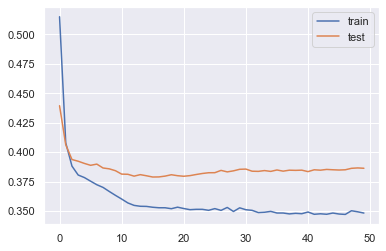

ValueError: operands could not be broadcast together with shapes (454,6) (7,) (454,6) 

In [41]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split

 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# for col in test_sdf.columns:
#     if col not in ['time', 'mood', 'sms', 'cal']:
#         scaler = MinMaxScaler(feature_range=(0, 1))
#         df_var = np.array(test_sdf[col]).reshape(-1, 1)
#         normalized = scaler.fit_transform(df_var)
#         test_sdf[col] = normalized

# load dataset
dataset = read_csv('data/testtest3.csv', header=0, index_col=0)
dataset = dataset.fillna(0)

# testrinus.index.name = 'id', 'time'
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, -1, 1)
# drop columns we don't want to predict
# reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())
 
# split into train and test sets
# values = reframed.values
# n_train_hours = 365 * 24
# train = values[:n_train_hours, :]
# test = values[n_train_hours:, :]

train, test = train_test_split(values, test_size=0.23, random_state=25)

#     if col not in ['time', 'mood', 'sms', 'cal']:
#         scaler = MinMaxScaler(feature_range=(0, 1))
#         df_var = np.array(test_sdf[col]).reshape(-1, 1)
#         normalized = scaler.fit_transform(df_var)
#         test_sdf[col] = normalized

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [44]:
# load the new file
dataset = read_csv('data/testtest3.csv', header=0)
# split into train and test
# train, test = split_dataset(dataset.values)
# X_train, X_val, y_train, y_val = train_test_split(
#     dataset[features_train], dataset[target_train], test_size=0.2)
train, test = train_test_split(dataset, test_size=0.2, random_state=25)
display(dataset)

,time,activity,appCat.values,call,circumplex.values,mood,screen,sms
0,2014-02-17,0.041548,21.900333,1.0,0.125000,6.250000,22.162157,0.0
1,2014-02-18,0.015309,22.311789,1.0,-0.142857,6.500000,56.542267,0.0
2,2014-02-19,0.064394,37.849680,1.0,0.100000,6.600000,137.494630,1.0
3,2014-02-20,0.039220,38.048714,1.0,0.000000,6.333334,117.011760,1.0
4,2014-02-21,0.042033,12.750950,1.0,0.600000,7.200000,33.210304,1.0
...,...,...,...,...,...,...,...,...
1968,2014-05-27,0.012704,29.703531,1.0,-0.100000,6.200000,113.607750,1.0
1969,2014-05-28,0.103301,27.164436,1.0,0.600000,8.200000,113.657684,1.0
1970,2014-05-29,0.169354,32.128033,1.0,-0.166667,7.000000,118.978035,1.0
1971,2014-05-30,0.192901,27.741684,1.0,-0.600000,6.800000,86.342250,1.0


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


dataset = pd.read_csv('data/testtest3.csv', header=0)
train_splitted, test_splitted = train_test_split(dataset, test_size=0.2, random_state=25)

# training_set = dataset_train.iloc[:, 1:2].values
training_set = train_splitted.iloc[:, 1:7].values

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(60, 1973):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 5, batch_size = 32)

# dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Epoch 1/100
 480/1913 [======>.......................] - ETA: 37s - loss: 0.0314

KeyboardInterrupt: 

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [61]:
from sklearn.preprocessing import MinMaxScaler
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

dataset = pd.read_csv('data/testtest3.csv', header=0)


scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(dataset).reshape(-1,1))

training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

math.sqrt(mean_squared_error(y_train,train_predict))

ValueError: could not convert string to float: '2014-02-17'